In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('profit_and_marketing_spend.csv')

In [3]:
df.head()

,Marketing Spend,Profit
0,471784.10,192261.83
1,443898.53,191792.06
2,407934.54,191050.39
3,383199.62,182901.99
4,366168.42,166187.94


In [4]:
df.describe()

,Marketing Spend,Profit
count,50.000000,50.000000
mean,211025.097800,112012.639200
std,122290.310726,40306.180338
min,0.000000,14681.400000
25%,129300.132500,90138.902500
50%,212716.240000,107978.190000
75%,299469.085000,139765.977500
max,471784.100000,192261.830000


In [6]:
x = df['Marketing Spend']
y = df['Profit']
m = len(x)

(0.0, 600000.0, 0.0, 250000.0)

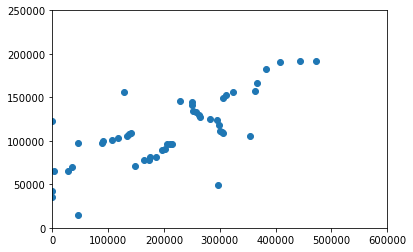

In [7]:
plt.scatter(df["Marketing Spend"], df["Profit"])
plt.axis([0,600000, 0, 250000])

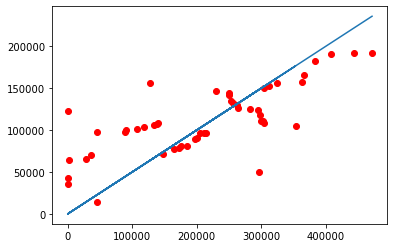

In [8]:
fig, ax = plt.subplots()
ax.plot(x, y, 'o', color='r', label = "training data")
ax.plot(x, 2 + 0.5* x , label ='h(x) = 2 + 0.5 * x ' )

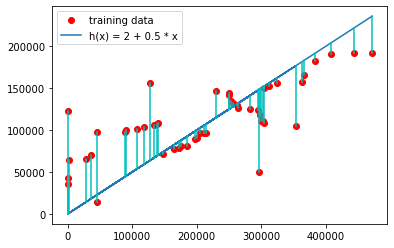

In [9]:
fig, ax = plt.subplots()
ax.plot(x, y, 'o', color='r', label='training data')
ax.plot(x, 2 + 0.5 * x, label='h(x) = 2 + 0.5 * x')
for i in range(len(x)):
    ax.plot([x[i], x[i]], [2 + 0.5 * x[i], y[i]], '-', color='c')
plt.legend()

In [10]:
def h(x, a0, a1):                             
    h = a0 + a1*x
    return h
def J(a0, a1, x, y, m):                       
    j = 0
    for i in range (m):
        j += (h(x[i], a0, a1) - y[i]) ** 2
    return j/(2*m)
def gradJ(a0, a1, x, y, m):                    
    Dja0 = 0 
    Dja1 = 0
    for i in range (m):
        Dja0 += (h(x[i],a0,a1) - y[i])
        Dja1 += (h(x[i],a0,a1) - y[i]) * x[i]
    gradJ = [Dja0/m, Dja1/m]
    return gradJ
def ap1(a0, a1, gJ, alpha):                   
    a0p1 = a0 - alpha * gJ[0]
    a1p1 = a1 - alpha * gJ[1]
    ap1 = [a0p1, a1p1]
    return ap1


0.12770197615457737 0.3657870719439869


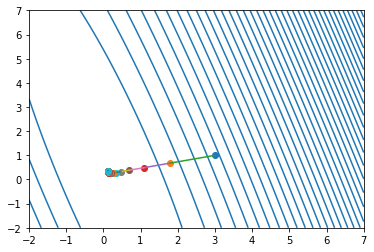

In [11]:
fig, ax = plt.subplots()
p0 = np.linspace(-2,7, 100)
p1 = np.linspace(-2,7, 100)
pa0, pa1 = np.meshgrid(p0, p1)      
ax.contour(pa0,pa1,J(pa0,pa1,x/800000,y/500000,m=len(x)) , colors='C0', levels=[i for i in np.arange(0,80)])
a0 = 3
a1 = 1
ax.plot(a0,a1, 'o')

for i in range(200):
    a0old, a1old = a0, a1
    a0,a1 = ap1(a0,a1, gJ=gradJ(a0,a1,x/800000,y/500000,m), alpha=0.4 )
    ax.plot(a0,a1,'o')
    ax.plot([a0old,a0],[a1old,a1], '-')
    

print(a0,a1)


In [15]:
x_mean = x.mean()
x_std = x.std()

y_mean = y.mean()
y_std = y.std()

x_new = (x - x_mean) / x_std           
y_new = (y - y_mean) / y_std

In [16]:
x_std,y_std


(122290.31072584528, 40306.18033765055)

3 1
1.4999999999999993 0.8764052036533239
0.7499999999999998 0.813371857516519
0.3749999999999997 0.7812248509867483
0.18749999999999975 0.7648298776565653
0.09374999999999975 0.7564684412581718
0.04687499999999977 0.7522041086949912
0.02343749999999976 0.750029299087769
0.01171874999999979 0.7489201461880858
0.0058593749999997615 0.7483544782092473
0.002929687499999746 0.7480659875400396
0.0014648437499997636 0.7479188572987437
0.0007324218749997348 0.7478438208756828
0.00036621093749972814 0.7478055522999217
0.0001831054687497459 0.7477860353262836
9.155273437475477e-05 0.7477760816697282
4.577636718722812e-05 0.7477710053048849
2.2888183593487003e-05 0.7477684163588149
1.1444091796658632e-05 0.7477670959963191
5.722045898178944e-06 0.7477664226114462
2.86102294899128e-06 0.7477660791851611
1.4305114743530393e-06 0.7477659040377557
7.15255737079438e-07 0.7477658147125789
3.576278684115512e-07 0.7477657691567388
1.7881393409870197e-07 0.7477657459232603
8.940696692673424e-08 0.7477657

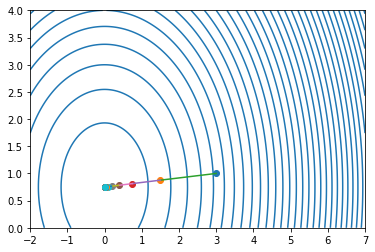

In [18]:
def plot_steps( startpt=[-1,4], alpha=.5, nsteps=20) :     
    fig, ax = plt.subplots()
    p0 = np.linspace(-2,7, 500)
    p1 = np.linspace(0,4, 500)
    pa0, pa1 = np.meshgrid(p0, p1)
    ax.contour(pa0,pa1,J(pa0,pa1,x_new,y_new,m=len(x)) , colors='C0' ,levels=[i for i in np.arange(0,80,.9)])

   
    a0 = startpt[0]
    a1 = startpt[1]
    ax.plot(a0,a1, 'o')
    print(a0,a1)

    for i in range(nsteps):
        a0old, a1old = a0, a1
        a0,a1 = ap1(a0,a1, gJ=gradJ(a0,a1,x_new,y_new,m), alpha=alpha)
        print(a0,a1) 
        ax.plot(a0,a1,'o')
        ax.plot([a0old,a0],[a1old,a1], '-') 
        
plot_steps( startpt=[3,1], alpha=.5, nsteps=80)

In [19]:
a0, a1

(0.12770197615457737, 0.3657870719439869)

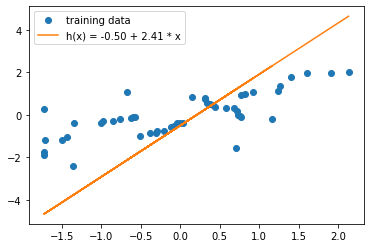

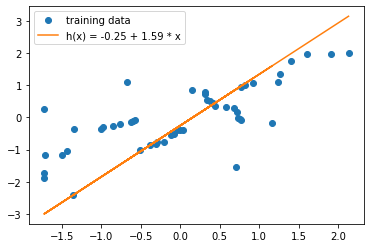

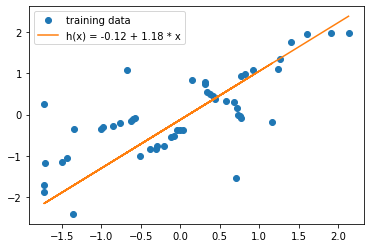

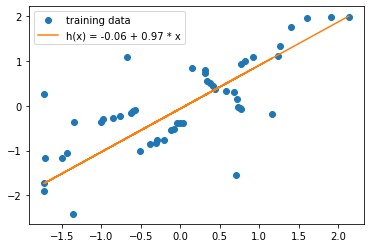

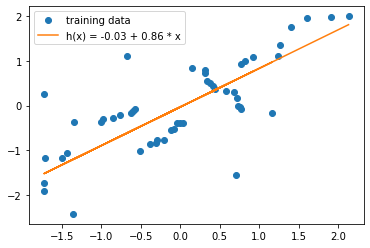

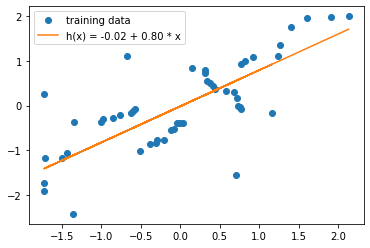

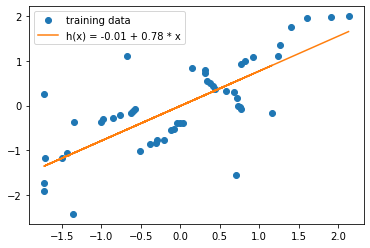

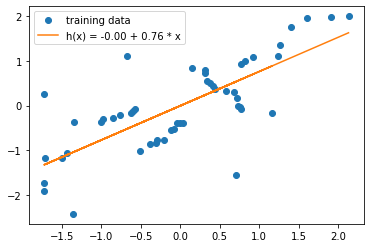

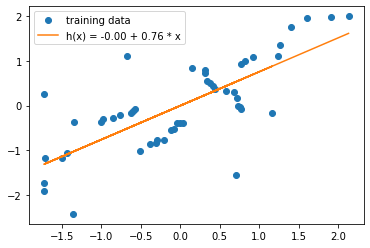

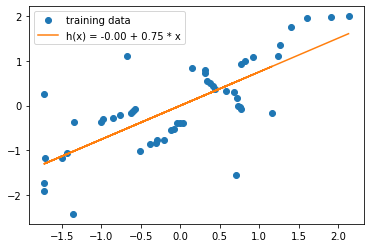

In [21]:
def plot_graph(x, y, a0, a1):
    fig, ax = plt.subplots()
    ax.plot(x,y, 'o', label='training data')
    ax.plot(x, h(x_new, a0, a1), label = "h(x) = %.2f + %.2f * x" %(a0, a1))
    plt.legend()
    

a0 = -1 
a1 = 4
for i in range (10) :
    a0, a1 = ap1(a0, a1, gJ = gradJ(a0, a1, x_new, y_new, m), alpha = 0.5)
    plot_graph(x_new, y_new, a0, a1)

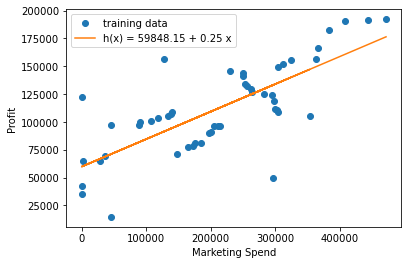

In [22]:
a0 =0
a1 = 0.75
b1 = y_std/x_std * a1
b0 = y_std * a0 - b1*x_mean + y_mean

fig, ax = plt.subplots()
ax.plot(x,y, 'o', label='training data')
ax.plot(x, b0 + b1*x, label='h(x) = %.2f + %.2f x' %(b0, b1))
ax.set_xlabel('Marketing Spend')
ax.set_ylabel('Profit')
plt.legend()

In [24]:
def predict(x, a0, a1) :
    pre = y_std * (a0 + a1 * (x - x_mean)/x_std) + y_mean
    return pre

a0 =0
a1 = 0.75
predict(366168.42, a0, a1)

150363.3966250556